In [1]:
import requests
from astropy.coordinates import SkyCoord
import astropy.wcs as wcs
%matplotlib notebook
import matplotlib
import matplotlib.pylab as plt
import oda_integral_wrapper.wrapper
import importlib
from astroquery.simbad import Simbad
from astropy import units as u
import numpy as np
from astropy import table
from astropy.io import fits

In [2]:
import os,sys
from importlib import reload
lib_path=os.path.abspath('/home/ferrigno/Soft/oda_integral_wrapper')
if lib_path not in sys.path:
    sys.path.append(lib_path)
else:
    print("Not appending")


importlib.reload(oda_integral_wrapper.wrapper)

wrap=oda_integral_wrapper.wrapper.INTEGRALwrapper(host_type='production')


--------------
instrumet: isgri

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: isgri_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: selected_catalog,  value: None,  units: str, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: osa_version,  value: None,  units: str, 
 name: E1_keV,  value: 10.0,  units: keV, 
 name: E2_keV,  value: 40.0,  units: keV, 

--------------
query_name: isgri_image_query
 product_name: isgri_image
 name: detection_threshold,  value: 0.0,  units: sigma, 
 name: image_scale_min,  value: None,  units: None, 
 name: image_scale_max,  value: None,  units: None, 

--------------
query_name: isg

In [3]:
lib_path=os.path.abspath("/home/ferrigno/Soft/pysas")
if lib_path not in sys.path:
    sys.path.append(lib_path)
else:
    print("Not appending")
import pysas


ModuleNotFoundError: No module named 'pysas'

In [4]:
s_max=50
osa_version='OSA10.2'
src_name='GX 5-1'
E1_keV=20.
E2_keV=30.
make_image=False
run_spec=True
run_jemx1=False
run_jemx2=True
extract_light_curve=False #LC binning for scw exposure is undefined
tstart='2003-01-01T00:00:00'
tstop='2004-01-01T00:00:00'
radius=3.0

In [5]:
from astroquery.simbad import Simbad
from astropy import units as u
from astropy.coordinates import SkyCoord

simbad = Simbad.query_object(src_name)
coord = SkyCoord(simbad['RA'], simbad['DEC'], unit=[u.hour, u.deg])
coord.fk5

print("Coordinates for %s are RA=%.4f, Dec=%.4f"%(src_name,coord.ra.deg[0], coord.dec.deg[0] ) )

ra=coord.ra.deg[0]
dec=coord.dec.deg[0]

Coordinates for GX 5-1 are RA=270.2905, Dec=-25.0789


In [6]:
from astropy.io import fits as pf

revs=[]
revs.append({'coord': coord, 'tstart': tstart, 'tstop': tstop, 'name': src_name})


--------------
instrumet: isgri

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: isgri_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: selected_catalog,  value: None,  units: str, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: osa_version,  value: None,  units: str, 
 name: E1_keV,  value: 10.0,  units: keV, 
 name: E2_keV,  value: 40.0,  units: keV, 

--------------
query_name: isgri_image_query
 product_name: isgri_image
 name: detection_threshold,  value: 0.0,  units: sigma, 
 name: image_scale_min,  value: None,  units: None, 
 name: image_scale_max,  value: None,  units: None, 

--------------
query_name: isg

<IPython.core.display.Javascript object>


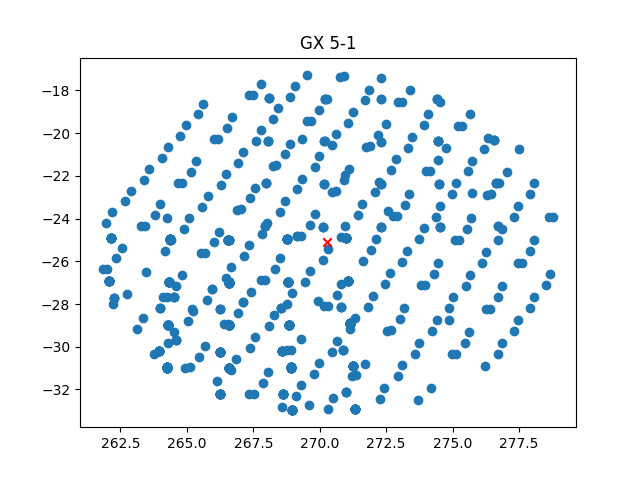

In [7]:
importlib.reload(oda_integral_wrapper.wrapper)

wrap=oda_integral_wrapper.wrapper.INTEGRALwrapper(host_type='production')

for i, source in enumerate(revs):
    
    print(source['coord'].ra.deg,source['tstart'])
    r=wrap.get_pointings(ra=source['coord'].ra.deg, dec=source['coord'].dec.deg, radius=8.0, 
                     tstart=source['tstart'], tstop=source['tstop'], type='cons')
    


    #print(r.keys())
    scwids = r['SWID']
    print(source['name'], ' nscw=%d'%(len(scwids)))
    revs[i].update(scwids=scwids)
    if len(scwids)>1:
        plt.figure()
        plt.scatter(r['RA_SCX'], r['DEC_SCX'])
        plt.title(source['name'])
        plt.scatter(source['coord'].ra.deg, source['coord'].dec.deg, color='red', marker='x')

In [8]:
#We have selected only GPS and GDCE observations from the database
scwids=np.loadtxt('list_osa10.txt', dtype=str, unpack=True)
revs[0]['scwids']=scwids


--------------
instrumet: isgri

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: isgri_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: selected_catalog,  value: None,  units: str, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: osa_version,  value: None,  units: str, 
 name: E1_keV,  value: 10.0,  units: keV, 
 name: E2_keV,  value: 40.0,  units: keV, 

--------------
query_name: isgri_image_query
 product_name: isgri_image
 name: detection_threshold,  value: 0.0,  units: sigma, 
 name: image_scale_min,  value: None,  units: None, 
 name: image_scale_max,  value: None,  units: None, 

--------------
query_name: isg

<IPython.core.display.Javascript object>


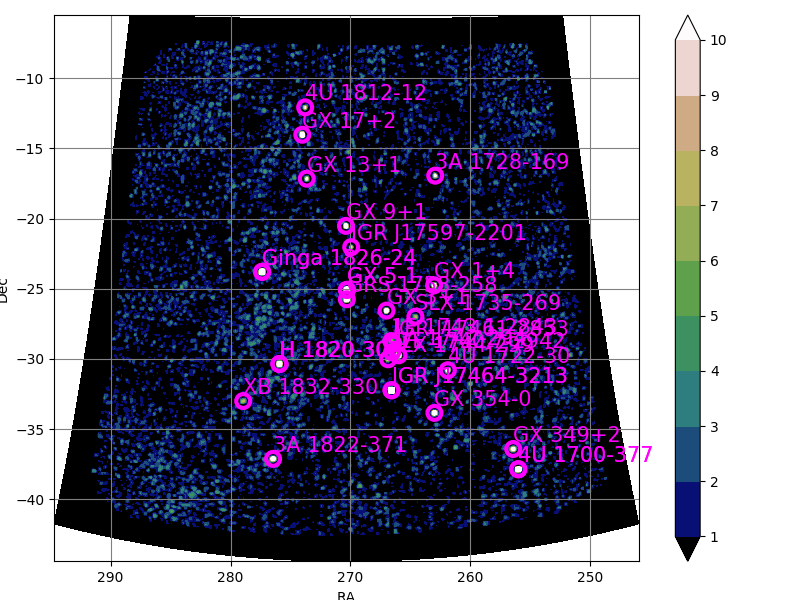

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [9]:
importlib.reload(oda_integral_wrapper.wrapper)

wrap=oda_integral_wrapper.wrapper.INTEGRALwrapper(host_type='production')

mosaics=[]
for source in revs:
    
    scw_list=[ss+'.001' for ss in source['scwids'] if ss.endswith('0')]
    
    if len(scw_list) < 5:
        print("\n************** Probably slews were selected for " + source['name'] +" ***************\n")
        continue
    
    print(len(scw_list))
    
    detection_threshold=7.0
    
    if make_image:
        data=wrap.long_scw_list_call(scw_list, s_max=50,
                         instrument='isgri',
                          product='isgri_image',
                          E1_keV=E1_keV,
                          E2_keV=E2_keV,
                          osa_version=osa_version,
                          RA=ra,
                          DEC=dec,
                          detection_threshold=detection_threshold,
                          product_type='Real')
        
        #Since image is not summed, a list is returned
        
        data[0].mosaic_image_0.write_fits_file(src_name.replace(' ','_').replace('+','p')+'_mosaic.fits',
                                               overwrite=True)
        
        api_cat=wrap.extract_catalog_string_from_image(data[0], det_sigma=detection_threshold)
        #, objects_of_interest=[(src_name, coord)], 
                                                       
        
        sources=data[0].dispatcher_catalog_1.table[data[0].dispatcher_catalog_1.table['significance']>=detection_threshold]
        
        
        with open('api_cat_str_gx5-1.txt','w') as f: 
            f.write(api_cat) 
        
        
        wrap.plot_image(data[0].mosaic_image_0.data_unit[1], sources)
            
        mosaics.append(data)
        break

In [10]:
if make_image:
    table_catalog=data[0].dispatcher_catalog_1.table
    print(table_catalog['src_names'])

   src_names   
---------------
    1A 1742-294
 1E 1740.7-2942
 1E 1743.1-2843
    3A 1728-169
    3A 1822-371
    4U 1700-377
     4U 1722-30
     4U 1812-12
   GRS 1758-258
         GX 1+4
            ...
IGR J17461-2853
IGR J17464-3213
IGR J17597-2201
   SLX 1735-269
   SLX 1744-299
    XB 1832-330
    4U 1700-377
IGR J17464-3213
         GX 5-1
     H 1820-303
  Ginga 1826-24
Length = 30 rows


In [11]:
if  not make_image:
    with open('api_cat_str_gx5-1.txt') as f: 
        api_cat_file = f.readlines() 
    
    api_cat=api_cat_file[0]

api_cat

'{"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[0, 3, 4, 12, 13, 23, 26, 29, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 66, 146, 148, 174, 248, 250, 267], ["1A 1742-294", "1E 1740.7-2942", "1E 1743.1-2843", "3A 1728-169", "3A 1822-371", "4U 1700-377", "4U 1722-30", "4U 1812-12", "GRS 1758-258", "GX 1+4", "GX 13+1", "GX 17+2", "GX 3+1", "GX 349+2", "GX 354-0", "GX 5-1", "GX 9+1", "Ginga 1826-24", "H 1820-303", "IGR J17461-2853", "IGR J17464-3213", "IGR J17597-2201", "SLX 1735-269", "SLX 1744-299", "XB 1832-330"], [7.149087905883789, 41.95341491699219, 7.221144676208496, 13.915672302246094, 20.241893768310547, 48.95846939086914, 19.111499786376953, 11.186989784240723, 44.59691619873047, 22.216283798217773, 13.58940601348877, 36.187110900878906, 32.601402282714844, 15.65728759765625, 27.53841209411621, 100.67333221435547, 30.83771514892578, 78.56993103027344, 42.801788330078125, 8.507301330566406, 134.3350830078125, 12.397741317749023, 7.795644283294678, 11.2718868255615

In [12]:
import json
tmp=json.loads(api_cat)
len(tmp['cat_column_list'][1])

25

In [13]:
importlib.reload(oda_integral_wrapper.wrapper)

wrap=oda_integral_wrapper.wrapper.INTEGRALwrapper(host_type='production')

all_spectra={}
for source in revs:
    
    name=source['name']
    
    scw_list=[ss+'.001' for ss in source['scwids'] if ss.endswith('0')]
    
    
    all_spectra.update({name: {'scw_list': scw_list}})
    if run_spec:
        spectra_isgri=wrap.long_scw_list_call(scw_list, s_max=50,
                                    instrument="isgri",
                                     product="isgri_spectrum",
                                     product_type="Real",
                                     osa_version=osa_version,
                                     E1_keV=E1_keV,
                                     E2_keV=E2_keV,
                                     selected_catalog=api_cat)
        all_spectra[name].update({'isgri': spectra_isgri})
        
        
    if run_jemx1:
        spectra_jemx1=wrap.long_scw_list_call(scw_list, s_max=50, instrument="jemx",
                     product="jemx_spectrum",
                              jemx_num=1,
                     product_type="Real",
                     osa_version=osa_version,
                     E1_keV=3,
                     E2_keV=20,
                     selected_catalog=api_cat)
        
        all_spectra[name].update({'jemx1': spectra_jemx1})
    if run_jemx2:
        spectra_jemx2=wrap.long_scw_list_call(scw_list, s_max=50, instrument="jemx",
                     product="jemx_spectrum",
                              jemx_num=2,
                     product_type="Real",
                     osa_version=osa_version,
                     E1_keV=3,
                     E2_keV=20,
                     selected_catalog=api_cat)
        
        all_spectra[name].update({'jemx2': spectra_jemx2})
        


--------------
instrumet: isgri

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: isgri_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: selected_catalog,  value: None,  units: str, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: osa_version,  value: None,  units: str, 
 name: E1_keV,  value: 10.0,  units: keV, 
 name: E2_keV,  value: 40.0,  units: keV, 

--------------
query_name: isgri_image_query
 product_name: isgri_image
 name: detection_threshold,  value: 0.0,  units: sigma, 
 name: image_scale_min,  value: None,  units: None, 
 name: image_scale_max,  value: None,  units: None, 

--------------
query_name: isg

/home/ferrigno/Soft/oda_integral_wrapper/oda_integral_wrapper/wrapper.py:317: RuntimeWarning: invalid value encountered in multiply
  err=spec['STAT_ERR']*0.




query done succesfully!
44 44
For source GX 5-1 the IDs for spe, arf and rmf are 21 22 23
Initialize with IDs for spe, arf and rmf 3 1 2
For source GX 5-1 the IDs for spe, arf and rmf are 21 22 23
40619.8587041552
Total exposure: 40619.8587041552
For source H 1820-303 the IDs for spe, arf and rmf are 30 31 32
Initialize with IDs for spe, arf and rmf 3 1 2
For source H 1820-303 the IDs for spe, arf and rmf are 30 31 32
12953.5660622875
Total exposure: 12953.5660622875
For source 1E 1743.1-2843 the IDs for spe, arf and rmf are 6 7 8
Initialize with IDs for spe, arf and rmf 3 1 2
For source 1E 1743.1-2843 the IDs for spe, arf and rmf are 6 7 8
23993.7031331393
Total exposure: 23993.7031331393
For source IGR J17464-3213 the IDs for spe, arf and rmf are 36 37 38
Initialize with IDs for spe, arf and rmf 3 1 2
For source IGR J17464-3213 the IDs for spe, arf and rmf are 36 37 38
5557.27249072746
Total exposure: 5557.27249072746
For source GX 13+1 the IDs for spe, arf and rmf are 15 16 17
Ini

In [14]:
importlib.reload(pysas)

# wrap=oda_integral_wrapper.wrapper.INTEGRALwrapper(host_type='production')


for name in all_spectra.keys():
        
    if run_spec:
        spectra_isgri=all_spectra[name]['isgri']
        isgri_spec,isgri_tstart, isgri_tstop, isgri_exposure = wrap.write_spectrum_fits_files(
            spectra_isgri,src_name, '', grouping=[20,100,-20], systematic_fraction=0.01)
        
    else:
        
        isgri_spec='IBIS_spectrum_%s_.fits'%name.replace(' ','_')
        isgri_exposure, isgri_tstart, isgri_tstop = pysas.get_spec_exp_times(isgri_spec)
    
    all_spectra[name].update( {'isgri_files' : {'fname': isgri_spec, 'tstart':isgri_tstart,
                                                    'tstop': isgri_tstop,
                                                    'exposure': isgri_exposure}})
        
    try:
        if run_jemx1:
            spectra_jemx1=all_spectra[name]['jemx1']
            jemx1_spec,jemx1_tstart, jemx1_tstop, jemx1_exposure = wrap.write_spectrum_fits_files(
                spectra_jemx1, src_name, '', systematic_fraction=0.03)
        else:

            jemx1_spec='JMX1_spectrum_%s_.fits'%name.replace(' ','_')
            jemx1_exposure, jemx1_tstart, jemx1_tstop = pysas.get_spec_exp_times(jemx1_spec)

        all_spectra[name].update( {'jemx1_files' : {'fname': jemx1_spec, 'tstart':jemx1_tstart,
                                                        'tstop': jemx1_tstop,
                                                        'exposure': jemx1_exposure}})
    except:
        print("No JEMX1 ?")
        pass
    
    if run_jemx2:
        spectra_jemx1=all_spectra[name]['jemx2']
        jemx2_spec,jemx2_tstart, jemx2_tstop, jemx2_exposure = wrap.write_spectrum_fits_files(
            spectra_jemx2, src_name, '', systematic_fraction=0.03)
    else:
        
        jemx2_spec='JMX2_spectrum_%s_.fits'%name.replace(' ','_')
        jemx2_exposure, jemx2_tstart, jemx2_tstop = pysas.get_spec_exp_times(jemx2_spec)
        
    all_spectra[name].update( {'jemx2_files' : {'fname': jemx2_spec, 'tstart':jemx2_tstart,
                                                    'tstop': jemx2_tstop,
                                                    'exposure': jemx2_exposure}})



Saving spectrum ./IBIS_spectrum_GX_5-1_.fits with rmf ./IBIS_rmf_GX_5-1_.fits and arf ./IBIS_arf_GX_5-1_.fits
Gometric grouping with step 1.084
No JEMX1 ?
Saving spectrum ./JMX2_spectrum_GX_5-1_.fits with rmf ./JMX2_rmf_GX_5-1_.fits and arf ./JMX2_arf_GX_5-1_.fits


In [15]:
all_spectra

{'GX 5-1': {'scw_list': ['005600620010.001',
   '005600630010.001',
   '005600800010.001',
   '005600810010.001',
   '005900170010.001',
   '006100710010.001',
   '006100800010.001',
   '006100860010.001',
   '006100870010.001',
   '006100880010.001',
   '006100960010.001',
   '006100970010.001',
   '006101030010.001',
   '006101040010.001',
   '006200200010.001',
   '006200700010.001',
   '006200770010.001',
   '006200780010.001',
   '006200790010.001',
   '006200850010.001',
   '006200860010.001',
   '006300230010.001',
   '006300240010.001',
   '011900910010.001',
   '011900920010.001',
   '011901070010.001',
   '011901080010.001',
   '012000600010.001',
   '012000610010.001',
   '012000700010.001',
   '012000760010.001',
   '012000770010.001',
   '012000780010.001',
   '012000860010.001',
   '012000870010.001',
   '012000930010.001',
   '012000940010.001',
   '012000950010.001',
   '012001020010.001',
   '012001030010.001',
   '012001110010.001',
   '012100110010.001',
   '01210012

GX5-1-western-
We load 2 spectra
['**-20.0, 70.0-**', '**-3.5,23.0-**']

***Warning: The file sent to Xset.restore(): mod_western.xcm
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tcl scripts may not fully execute in PyXspec.


kT__2 2.2231367325386855
norm__3 14.169463452330238
T0__5 1.092268842989867
kT__6 5.76809621012569
taup__7 1.2804968303372364
norm__9 1.0041323909624935
factor__10 0.7815151367618408
Test statistics= 21.371271749102686 Chi2= 21.371271749102686 dof= 19


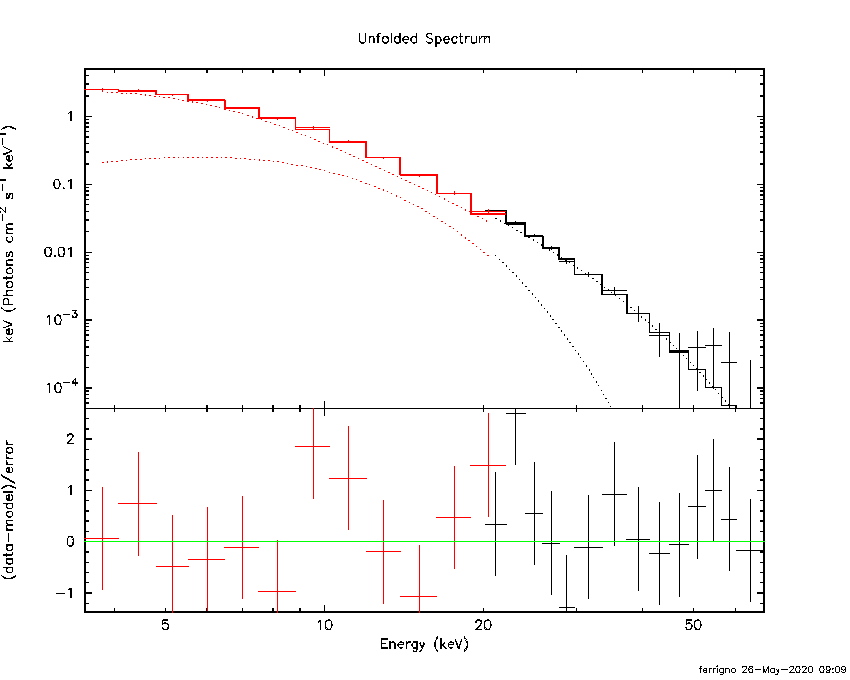

Fit Stat= 18.376931750598196 Chi2= 18.376931750598196 dof= 19

Spectral parameters:

	factor 1.0  
	kT__02 2.1 keV (2.0-2.2)
	norm__03 23  (18-38)
	Redshift 0.00  
	T0__05 1.06 keV (1.02-1.09)
	kT__06 5.5 keV (4.9-6.0)
	taup__07 1.4  (1.2-1.8)
	approx 1.0  
	norm__09 1.1  (1.0-1.2)
	factor__10 0.76  (0.73-0.79)
	kT 2.1 keV 
	norm 23  
	Redshift 0.00  
	T0 1.1 keV 
	kT 5.5 keV 
	taup 1.4  
	approx 1.0  
	norm 1.1  


In [16]:
import xspec
verbose=True
ignore_string=['**-20.0, 70.0-**', '**-3.5,23.0-**']
#mod_file='mod_cut.xcm'
mod_file='mod_western.xcm'


chains=[]
fit_by_bin={}

for i,ss in enumerate(all_spectra.keys()):
#     if i >6:
#         continue
    
    outputfiles_basename=ss.replace(' ','')+'-'+mod_file.replace('mod_','').replace('.xcm','')+"-"
    print(outputfiles_basename)
    run_chain=True
    load_chain=False
    perform_fit=True
    
#     if i>6:
#         load_chain=True
#         run_chain=False
    isgri_spec = all_spectra[ss]['isgri_files']['fname']
    jemx2_spec = all_spectra[ss]['jemx2_files']['fname']
    
    chain_name, fit_res =pysas.epic_xspec_mcmc_fit(xspec, mod_file, 
                                outputfiles_basename = outputfiles_basename,
                                pn_spec = isgri_spec,
                                mos1_spec = jemx2_spec,
                                mos2_spec = 'none', 
                                jeffreys_priors=['norm', 'kT', 'tau'],
                                ignore_string=ignore_string,
                                load_chain=load_chain, perform_fit=perform_fit, set_priors=True, walkers=40, 
                                               run_chain=run_chain,
                                               compute_errors=True, save_xcm=True, statistics='chi' )
    chains.append(chain_name)
    
    #exposure, tstart, tstop = pysas.get_spec_exp_times(ss)
    
    #print(tstart, tstop)
    
    
    fit_res.update( {'times':[all_spectra[ss]['isgri_files']['tstart'], 
                              all_spectra[ss]['isgri_files']['tstop']] } )
    xspec.AllModels.calcFlux('5. 20. error 1000 68.0')
    flux1=xspec.AllData(2).flux[0:3]
    xspec.AllModels.calcFlux('20. 100. error 1000 68.0')
    flux2=xspec.AllData(1).flux[0:3]
    luminosity=(np.array(flux1)+np.array(flux2))*4 * np.pi * (7 * u.kpc.to(u.cm))**2
    
    fit_res.update({'luminosity': luminosity})
    fit_res.update({'flux_5_20': flux1})
    fit_res.update({'flux_20_100': flux2})
    
    fit_by_bin.update({outputfiles_basename : fit_res})

In [17]:
models = [xspec.AllModels(j) for j in range(1, 2 + 1)]
for j, m1 in enumerate(models):
    for comp_name in m1.componentNames:
        comp=getattr(m1,comp_name)
        for par_name in comp.parameterNames:
            par=getattr(comp,par_name)
            print(oda_integral_wrapper.wrapper.get_parameter_output_string(comp, par, par_range=False, 
                                                       threshold_plusminus=0.1, latex_out=True))

constant & factor & 1.0 & -- &  \\
bbodyrad & kT & 2.1$_{-0.1}^{+0.1}$ & keV \\
bbodyrad & norm & 2.3e+01$_{-5.1e+00}^{+1.6e+01}$ &  \\
compTT & Redshift & 0.00 & -- &  \\
compTT & T0 & 1.06$_{-0.04}^{+0.03}$ & keV \\
compTT & kT & 5.5$_{-0.6}^{+0.5}$ & keV \\
compTT & taup & 1.4$_{-0.2}^{+0.3}$ &  \\
compTT & approx & 1.0 & -- &  \\
compTT & norm & 1.1$_{-0.1}^{+0.1}$ &  \\
constant & factor & 0.76 &$\pm$ 0.03 &  \\
bbodyrad & kT & 2.1 & keV & (= p2) \\
bbodyrad & norm & 23 &  & (= p3) \\
compTT & Redshift & 0.00 &  & (= p4) \\
compTT & T0 & 1.1 & keV & (= p5) \\
compTT & kT & 5.5 & keV & (= p6) \\
compTT & taup & 1.4 &  & (= p7) \\
compTT & approx & 1.0 &  & (= p8) \\
compTT & norm & 1.1 &  & (= p9) \\


GX5-1-eastern-
We load 2 spectra
['**-20.0, 70.0-**', '**-3.5,23.0-**']

***Warning: The file sent to Xset.restore(): mod_eastern.xcm
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tcl scripts may not fully execute in PyXspec.


Tin__2 2.0248497558122556
norm__3 119.2607460429399
kT__4 3.2954476147617786
tau__6 0.018748048691898597
norm__7 1.9307629713796592
factor__8 0.7557821357077642
Test statistics= 20.061240230905923 Chi2= 20.061240230905923 dof= 20


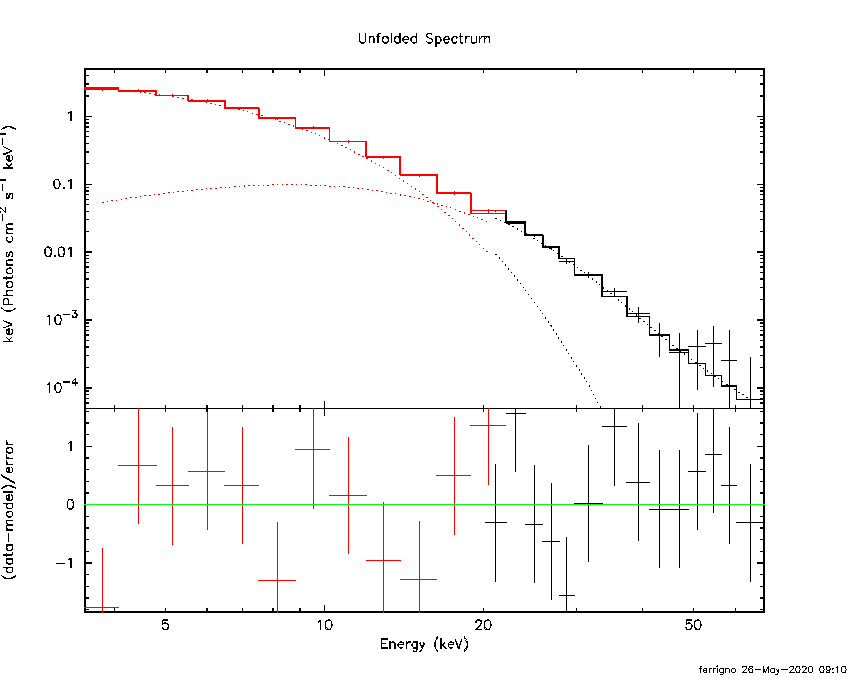

Fit Stat= 19.077029105514015 Chi2= 19.077029105514015 dof= 20

Spectral parameters:

	factor 1.0  
	Tin__02 1.96 keV (1.95-2.02)
	norm__03 140  (121-142)
	kT__04 2.8885 keV (2.8876-3.1989)
	kTe 10 keV 
	tau__06 0.33  (0.15-0.34)
	norm__07 6.0  (2.6-6.0)
	factor__08 0.73  (0.70-0.77)
	Tin 2.0 keV 
	norm 140  
	kT 2.9 keV 
	kTe 10 keV 
	tau 0.3  
	norm 6.0  


In [18]:
import xspec
verbose=True
#mod_file='mod_cut.xcm'
mod_file='mod_eastern.xcm'


for i,ss in enumerate(all_spectra.keys()):
#     if i >6:
#         continue
    
    outputfiles_basename=ss.replace(' ','')+'-'+mod_file.replace('mod_','').replace('.xcm','')+"-"
    print(outputfiles_basename)
    run_chain=True
    load_chain=False
    perform_fit=True
#     if i>6:
#         load_chain=True
#         run_chain=False
    isgri_spec = all_spectra[ss]['isgri_files']['fname']
    jemx2_spec = all_spectra[ss]['jemx2_files']['fname']
    
    chain_name, fit_res =pysas.epic_xspec_mcmc_fit(xspec, mod_file, 
                                outputfiles_basename = outputfiles_basename,
                                pn_spec = isgri_spec,
                                mos1_spec = jemx2_spec,
                                mos2_spec = 'none', 
                                jeffreys_priors=['norm', 'kT', 'tau'],
                                ignore_string=ignore_string,
                                load_chain=load_chain, perform_fit=True, set_priors=True, walkers=40, 
                                               run_chain=run_chain,
                                               compute_errors=True, save_xcm=True, statistics='chi' )
    chains.append(chain_name)
    
    #exposure, tstart, tstop = pysas.get_spec_exp_times(ss)
    
    #print(tstart, tstop)
    
    
    fit_res.update( {'times':[all_spectra[ss]['isgri_files']['tstart'], 
                              all_spectra[ss]['isgri_files']['tstop']] } )
    xspec.AllModels.calcFlux('5. 20. error 1000 68.0')
    flux1=xspec.AllData(2).flux[0:3]
    xspec.AllModels.calcFlux('20. 100. error 1000 68.0')
    flux2=xspec.AllData(1).flux[0:3]
    luminosity=(np.array(flux1)+np.array(flux2))*4 * np.pi * (7 * u.kpc.to(u.cm))**2
    
    fit_res.update({'luminosity': luminosity})
    fit_res.update({'flux_5_20': flux1})
    fit_res.update({'flux_20_100': flux2})
    
    fit_by_bin.update({outputfiles_basename : fit_res})

In [19]:
models = [xspec.AllModels(j) for j in range(1, 2 + 1)]
for j, m1 in enumerate(models):
    for comp_name in m1.componentNames:
        comp=getattr(m1,comp_name)
        for par_name in comp.parameterNames:
            par=getattr(comp,par_name)
            print(oda_integral_wrapper.wrapper.get_parameter_output_string(comp, par, par_range=False, 
                                                       threshold_plusminus=0.1, latex_out=True))

constant & factor & 1.0 & -- &  \\
diskbb & Tin & 1.96$_{-0.01}^{+0.07}$ & keV \\
diskbb & norm & 140$_{-19}^{+2}$ &  \\
compbb & kT & 2.8885$_{-0.0009}^{+0.3104}$ & keV \\
compbb & kTe & 10 & -- & keV \\
compbb & tau & 0.33$_{-0.18}^{+0.01}$ &  \\
compbb & norm & 6.0$_{-3.4}^{+0.0}$ &  \\
constant & factor & 0.73$_{-0.02}^{+0.05}$ &  \\
diskbb & Tin & 2.0 & keV & (= p2) \\
diskbb & norm & 140 &  & (= p3) \\
compbb & kT & 2.9 & keV & (= p4) \\
compbb & kTe & 10 & keV & (= p5) \\
compbb & tau & 0.3 &  & (= p6) \\
compbb & norm & 6.0 &  & (= p7) \\


In [20]:
pysas.dump_yaml(fit_by_bin, 'GX_5-1.yaml')

In [21]:
latex_label_dict={
'cutoffE__03' : '$E_\\mathrm{C}$',
'foldE__04' : '$E_\\mathrm{F}$',
'HighECut__03' : '$E_\\mathrm{F}$',
'PhoIndex__05' : '$\\Gamma$',
'norm__08' : 'Flux (20-200 keV)',
'norm__10' : 'r$_\mathrm{bb}$ (km$^2$/d$^2$)',
'LineE__05' : '$E_\\mathrm{Cyc1}$',
'Sigma__06' : '$\\sigma_\\mathrm{Cyc1}$',
'Strength__07' : '$\\tau_\\mathrm{Cyc1}$',
# 'LineE__08' : '$E_\\mathrm{Cyc1}$',
# 'Sigma__09' : '$\\sigma_\\mathrm{Cyc1}$',
# 'Strength__10' : '$\\tau_\\mathrm{Cyc1}$',
'LineE__08' : '$E_\\mathrm{Cyc2}$',
'Sigma__09' : '$\\sigma_\\mathrm{Cyc2}$',
'Strength__10' : '$\\tau_\\mathrm{Cyc2}$',
'LineE__11' : '$E_\\mathrm{Cyc2}$',
'Sigma__12' : '$\\sigma_\\mathrm{Cyc2}$',
'Strength__13' : '$\\tau_\\mathrm{Cyc2}$',
'rate': 'ISGRI rate',
'luminosity': '$L_{37}$'
}




In [22]:
def get_parameter_output_string(par, qq, par_range=True, threshold_plusminus=0.1, latex_out=False):

    val = qq[0.5]
    lval = qq[0.16]
    uval = qq[0.84]
    unit=''
    if 'lg10Flux' in par:
        val = 10 ** (val + 10)
        lval = 10 ** (lval + 10)
        uval = 10 ** (uval + 10)
        #unit = 'x1e-10 erg/s/cm^2'
    
    par_name=par.split('__')[0]
    
    format_str = oda_integral_wrapper.wrapper.get_format_string(val, uval, lval)
    if par_range:
        output_str = "%s " + format_str + " %s (" + format_str + "-" + format_str + ")"
        return_str = output_str % (par_name, val, unit, lval, uval)
    else:
        #print(np.abs((lval + uval - 2*val) / (-lval+uval) * 2))
        if np.abs((lval + uval-2*val) / (-lval+uval) * 2) > threshold_plusminus:
            output_str = "%s " + format_str + " (" + format_str + " +" + format_str + ") %s"
            if latex_out:
                output_str = "%s & " + format_str + "&$_{" + format_str + "}^{+" + format_str + "}$ & %s \\\\"
            return_str=output_str % (par_name, val, lval-val, uval-val, unit)
        else:
            output_str = "%s " + format_str + " +/- " + format_str + " %s"
            if latex_out:
                output_str = "%s & " + format_str + " &$\pm$ " + format_str + " & %s \\\\"
            return_str = output_str % (par_name, val, (uval-lval)/2, unit)



    return return_str

GX5-1-western-chain.fits


<IPython.core.display.Javascript object>


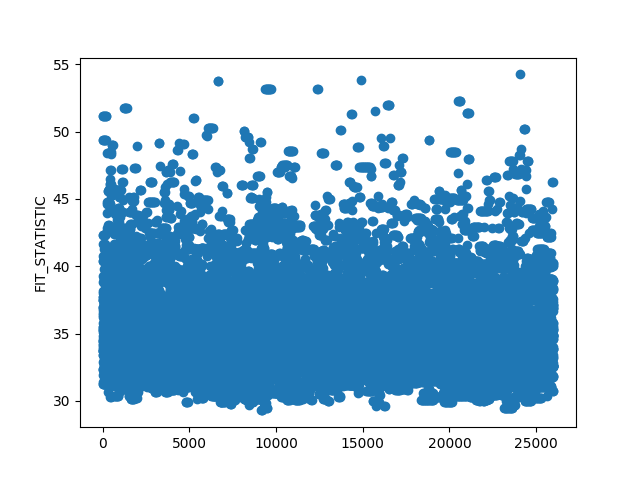

<IPython.core.display.Javascript object>


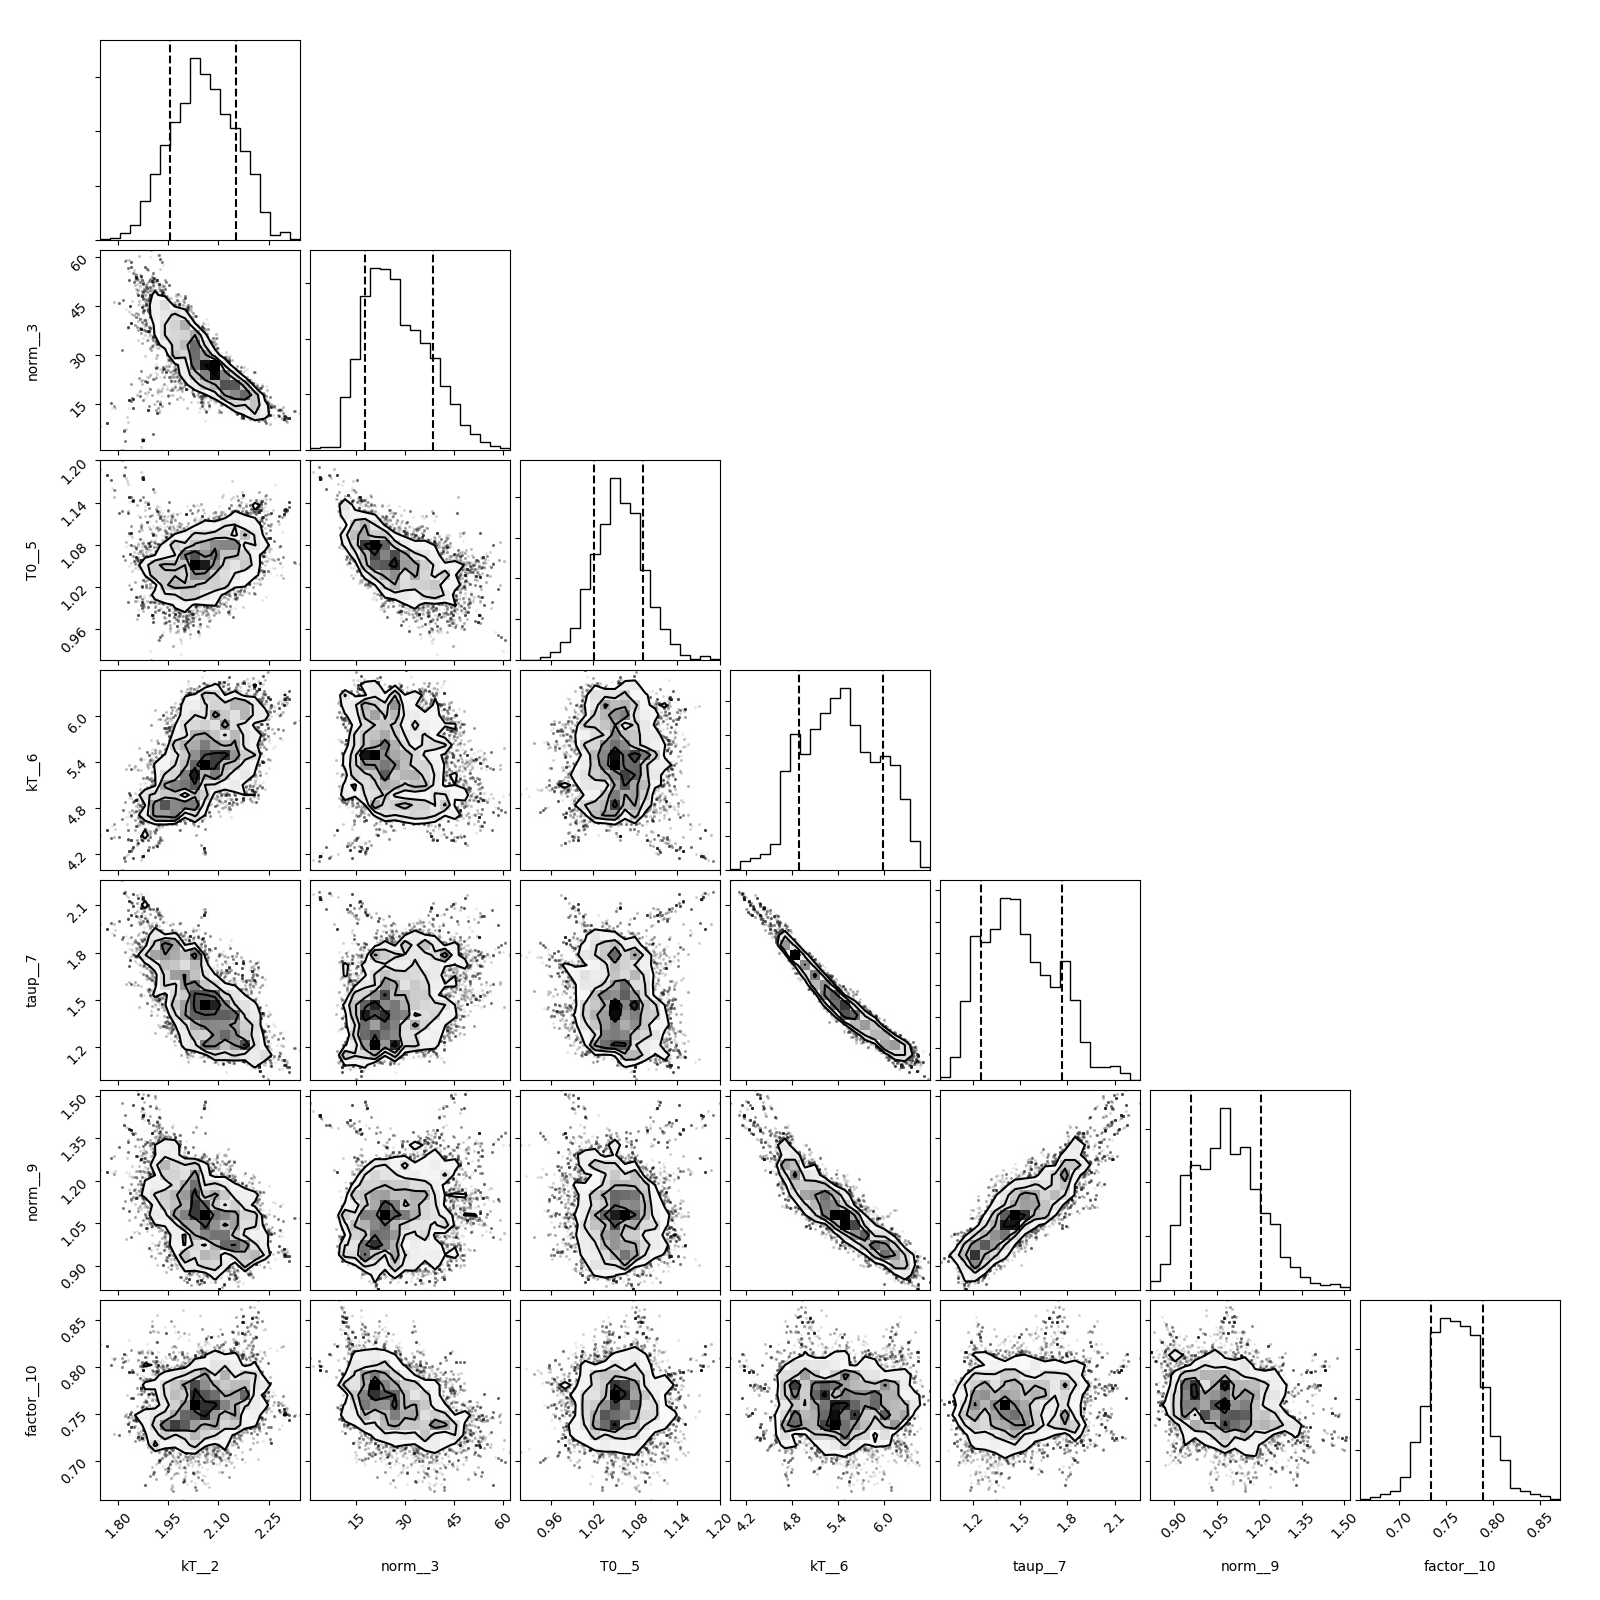

         kT__2    norm__3     T0__5     kT__6   taup__7   norm__9  factor__10
0.16  1.954982  17.775684  1.021953  4.888011  1.246559  0.958472    0.734143
0.50  2.053629  26.177525  1.056721  5.420540  1.468073  1.080005    0.760909
0.84  2.153373  38.361925  1.090939  5.987080  1.766319  1.208175    0.788947
kT & 2.05 &$\pm$ 0.10 &  \\
norm & 2.6e+01&$_{-8.4e+00}^{+1.2e+01}$ &  \\
T0 & 1.06 &$\pm$ 0.03 &  \\
kT & 5.4 &$\pm$ 0.5 &  \\
taup & 1.5&$_{-0.2}^{+0.3}$ &  \\
norm & 1.1 &$\pm$ 0.1 &  \\
factor & 0.76 &$\pm$ 0.03 &  \\
GX5-1-eastern-chain.fits


<IPython.core.display.Javascript object>


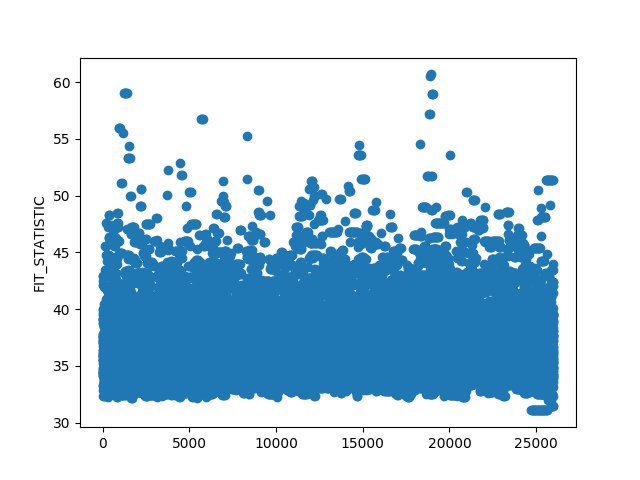

<IPython.core.display.Javascript object>


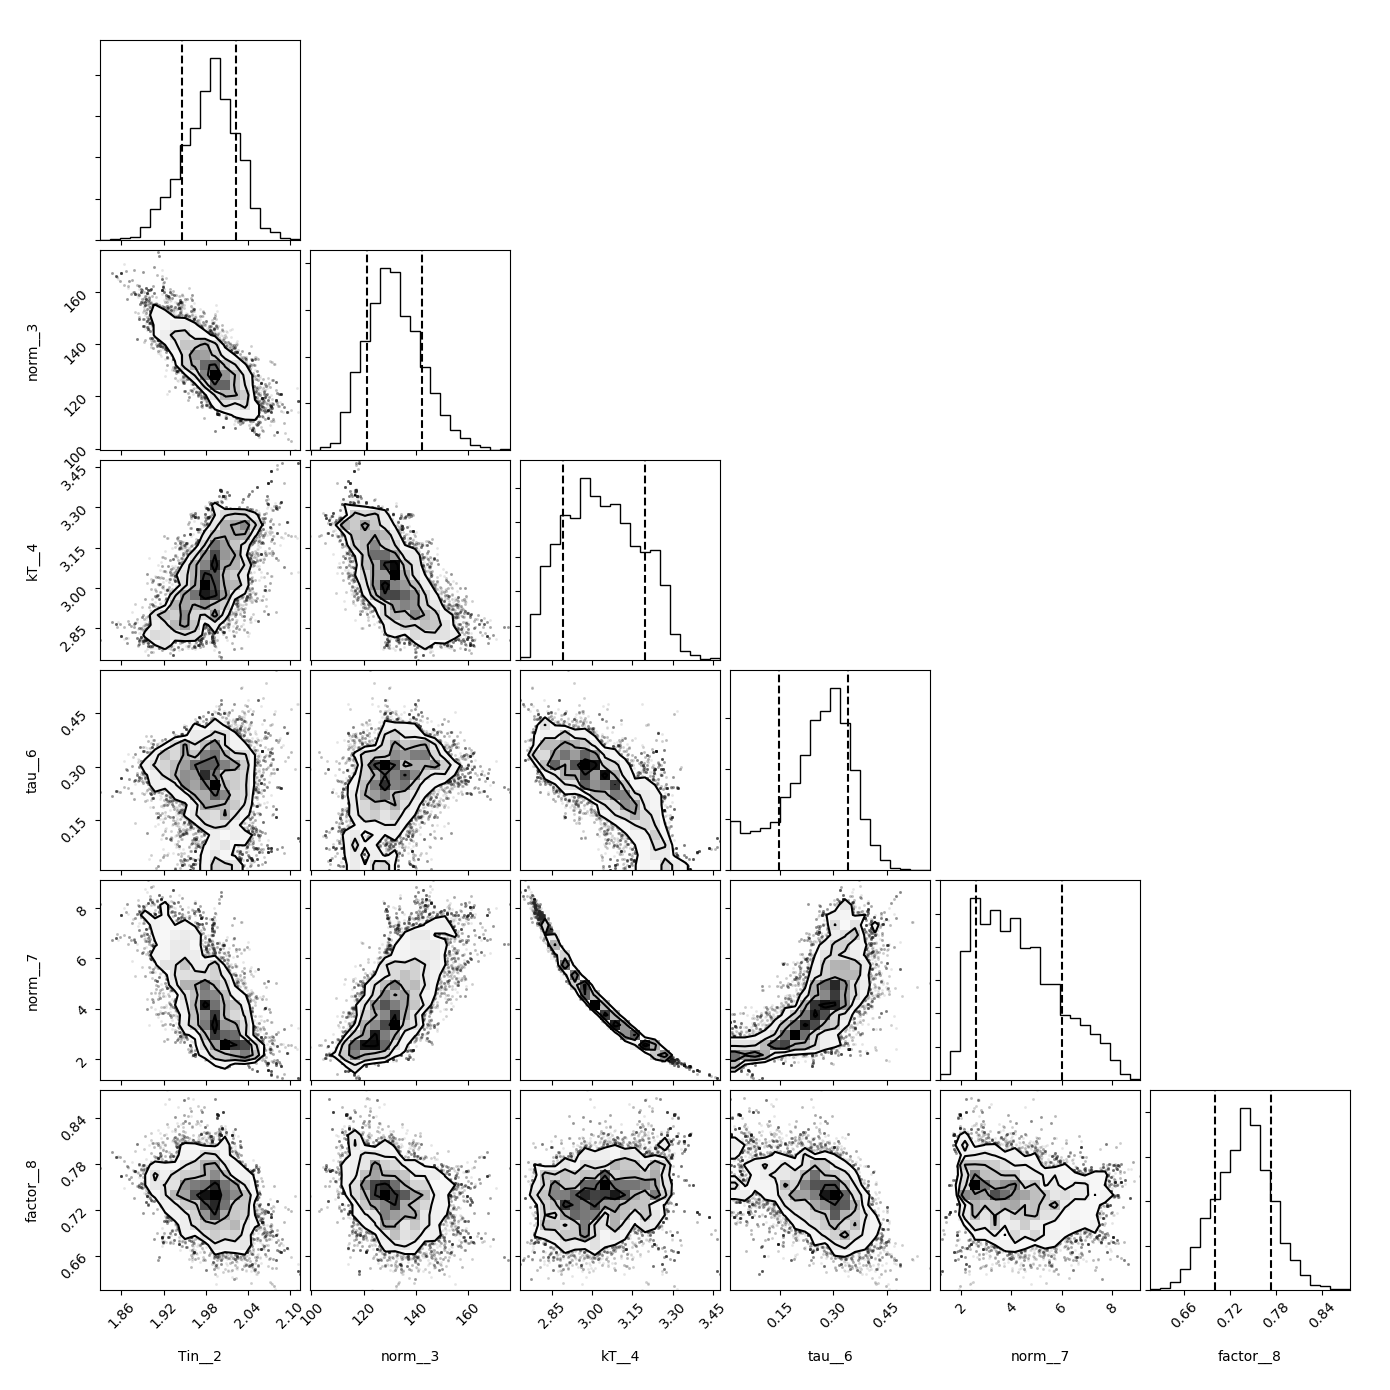

        Tin__2     norm__3     kT__4    tau__6   norm__7  factor__8
0.16  1.946303  121.191768  2.888044  0.148355  2.591575   0.700438
0.50  1.988241  130.935999  3.029128  0.266325  4.052476   0.738883
0.84  2.023712  142.413917  3.198532  0.343052  6.023876   0.773171
Tin & 1.99&$_{-0.04}^{+0.04}$ &  \\
norm & 1.31e+02&$_{-9.74e+00}^{+1.15e+01}$ &  \\
kT & 3.0&$_{-0.1}^{+0.2}$ &  \\
tau & 0.27&$_{-0.12}^{+0.08}$ &  \\
norm & 4.1&$_{-1.5}^{+2.0}$ &  \\
factor & 0.74&$_{-0.04}^{+0.03}$ &  \\


In [23]:
reload(pysas)
from astropy.table import Table
import corner
import xspec
from glob import glob
from matplotlib import rc
import re
#fit_by_bin = {}

plot_chains=True
plot_corners=True

#chains=sorted(glob('GW-pcfabs-0??-chain.fits'))
#chains=sorted(glob('GW-pcfabs-chain.fits'))
#chains=['BXA-pcfabs-chain.fits']


rc('text', usetex=False)

for i,chain_name in enumerate(chains):
    
#     if chain_name != 'GW-pcfabs-010-chain.fits':
#         continue
    
    print(chain_name)
    obsid=chain_name.replace('-chain.fits','')
    
    table_chain=Table.read(chain_name)
    chain_df=table_chain.to_pandas()
    
    if plot_chains:
        for kk in table_chain.keys():
            if kk != 'FIT_STATISTIC':
                continue
            ff=plt.figure()
            plt.plot(table_chain[kk], 'o')
            ax=ff.gca()
            ax.set_ylabel(kk)
    
    
    chain_par_names=table_chain.keys()
    
    to_drop=['FIT_STATISTIC']
    
#     for kk in chain_par_names:
#         if 'factor' in kk:
#             to_drop.append(kk)
    
    for kk in to_drop:
        chain_df.drop(kk, 1,  inplace=True)
   

    #labels=[pysas.default_latex_label_dict[kk] for kk in list(chain_df.columns) ]
  
    #rc('text', usetex=True)
    if plot_corners:
        corner_plot=corner.corner(chain_df, bins=20,  quantiles=[0.16,0.84] )
        #labels=labels,
        corner_plot.savefig(chain_name.replace('.fits','')+'_corner_%s.pdf'%obsid)
    #rc('text', usetex=False)
    
    
    quantiles=chain_df.quantile([0.16,0.5,0.84],axis=0)
    print(quantiles)
    for par, qq in quantiles.items():
        print(get_parameter_output_string(par, qq, par_range=False, threshold_plusminus=0.1, latex_out=True))


In [24]:
fit_by_bin

{'GX5-1-western-': {'rate': [10.885767735540867,
   10.733432357756287,
   11.038103113325446],
  'cstat': [18.376931750598196, 19],
  'kT__02': [2.1008964172808167, 1.9546354793107419, 2.1541107675379014],
  'norm__03': [22.79883147713553, 17.73480292514414, 38.42861271930608],
  'T0__05': [1.0634758635388355, 1.021698802681605, 1.0910167002203162],
  'kT__06': [5.480225462705479, 4.8845393588504535, 5.9895498132750635],
  'taup__07': [1.4321574795035916, 1.2458575328422263, 1.767488280003428],
  'norm__09': [1.0701462919946125, 0.9583904381032551, 1.20893610564989],
  'factor__10': [0.7623212359535984, 0.733884181797776, 0.7890917593356159],
  'times': [52729.45512418833, 52925.64765825547],
  'luminosity': array([7.79233554e+37, 7.69746592e+37, 7.88494904e+37]),
  'flux_5_20': (1.2894305020686319e-08,
   1.2737750987343178e-08,
   1.304482390911726e-08),
  'flux_20_100': (3.9678534223783727e-10,
   3.9152386446929287e-10,
   4.042337683775333e-10)},
 'GX5-1-eastern-': {'rate': [10.8